In [1]:
import pandas as pd

In [3]:
import numpy as np


In [8]:
dataset = pd.read_csv('electronics.csv')

In [9]:
dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [11]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [12]:
import seaborn as sns

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [14]:
from datetime import datetime

pd.to_datetime(dataset['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

In [15]:
dataset['brand'] = dataset['brand'].astype(str)
dataset['category'] = dataset['category'].astype(str)
dataset['rating'] = dataset['rating'].astype(float)
dataset['user_id'] = dataset['user_id'].astype(str)
dataset['item_id'] = dataset['item_id'].astype(str)
dataset.describe()

,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2.012938e+03,1.747587e-01
std,1.379732e+00,2.643513e+00,5.506810e-01
min,1.000000e+00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2.012000e+03,0.000000e+00
50%,5.000000e+00,2.014000e+03,0.000000e+00
75%,5.000000e+00,2.015000e+03,0.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00


In [16]:
dataset.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
dtype: int64

In [20]:
dataset.duplicated().sum()

0

<Axes: xlabel='rating', ylabel='count'>

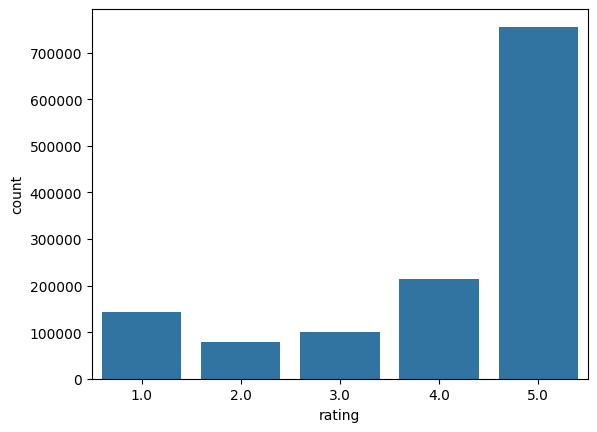

In [24]:
sns.countplot(x='rating', data=dataset)

<Axes: xlabel='year'>

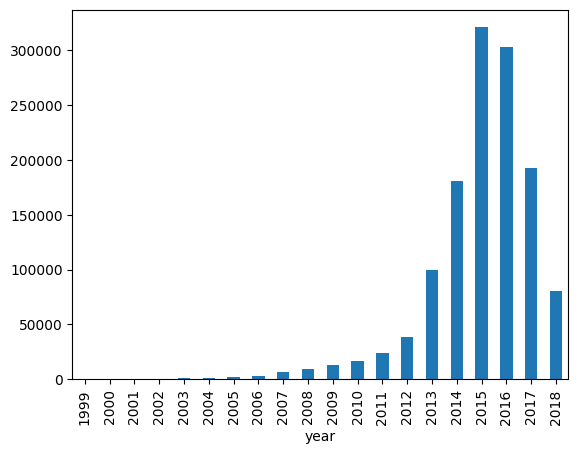

In [25]:
dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset.groupby('year')['rating'].count().plot(kind='bar')

<Axes: xlabel='year'>

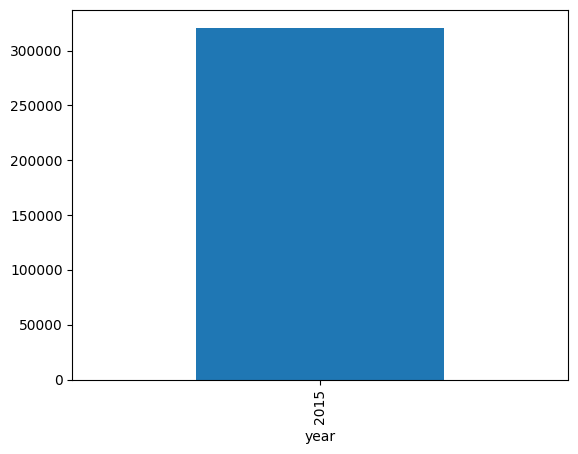

In [28]:
dataset[dataset['year'] == 2015].groupby('year')['rating'].count().plot(kind='bar')

<Axes: xlabel='month'>

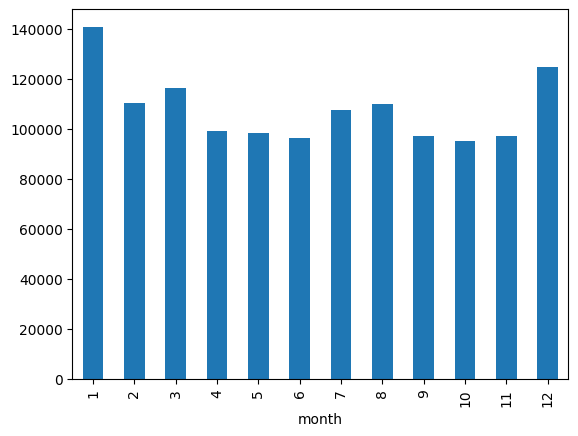

In [29]:
dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset.groupby('month')['rating'].count().plot(kind='bar')

<Axes: xlabel='category'>

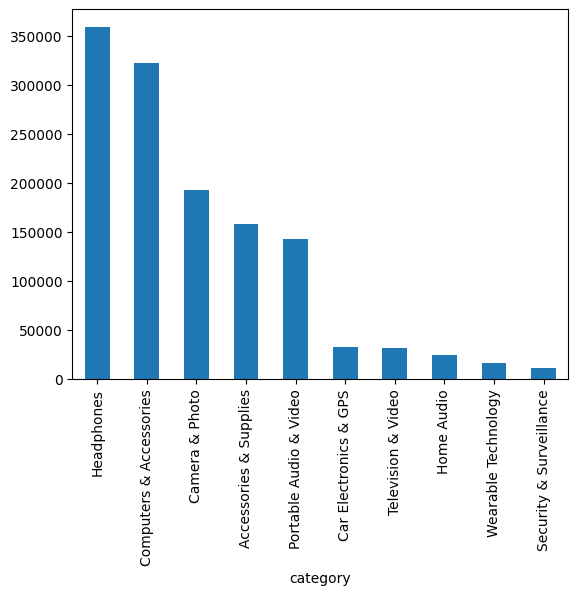

In [31]:
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: xlabel='brand'>

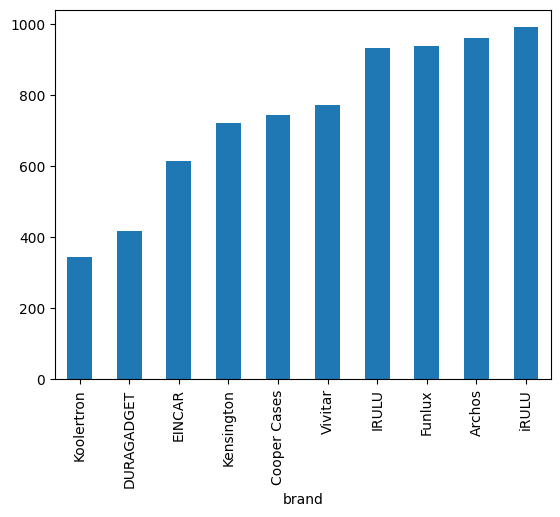

In [32]:
dataset.groupby('brand')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')

<Axes: xlabel='category'>

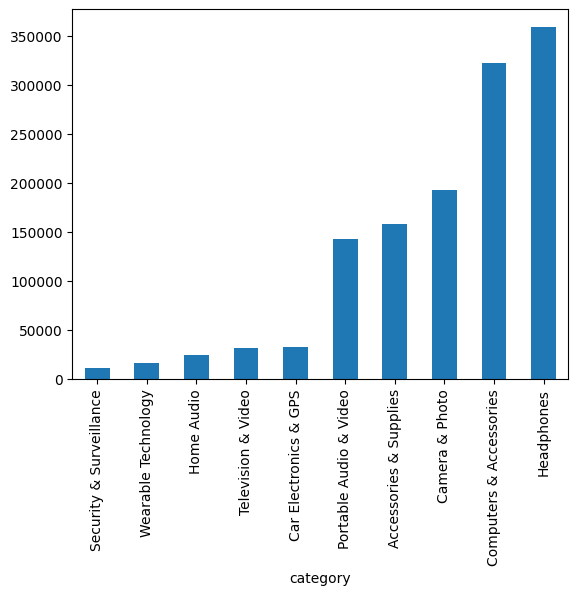

In [33]:
dataset.groupby('category')['rating'].count().sort_values(ascending=True).head(10).plot(kind='bar')

<Axes: ylabel='rating'>

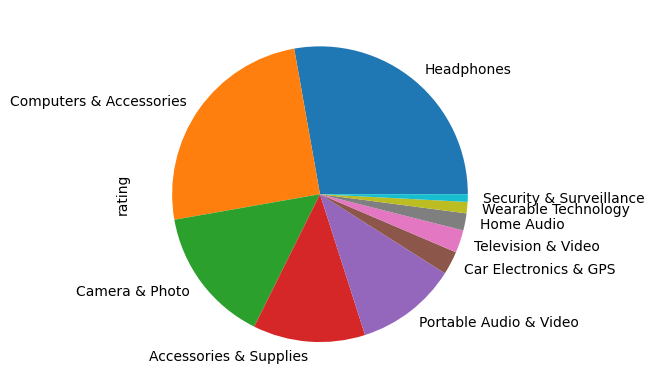

In [34]:
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

In [36]:
dataset.dropna(inplace=True)

In [37]:
dataset.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
month         0
dtype: int64

In [39]:
dataset['rating'].value_counts()

rating
5.0    107593
4.0     30104
3.0     14593
1.0     12652
2.0      9182
Name: count, dtype: int64

<Axes: xlabel='brand', ylabel='count'>

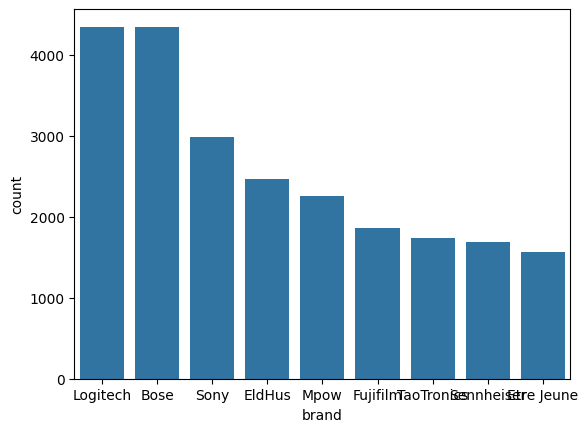

In [40]:
sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[1:10].index)

<Axes: xlabel='brand', ylabel='count'>

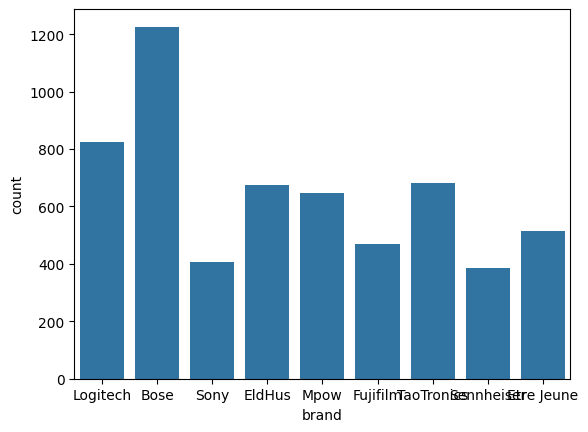

In [41]:
sns.countplot(x='brand', data=dataset[dataset['year'] == 2016], order=dataset['brand'].value_counts().iloc[1:10].index)

<Axes: xlabel='category', ylabel='count'>

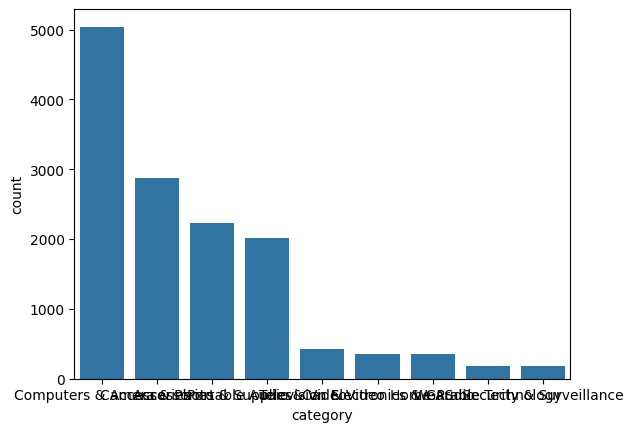

In [42]:
sns.countplot(x='category', data=dataset[dataset['month'] == 1], order=dataset['category'].value_counts().iloc[1:10].index)